# Solving MIS by solving a QUBO

[`qubo-solver`](https://github.com/pasqal-io/qubo-solver) is a package aimed at solving quadratic unconstrained binary optimization (QUBO) problems. MIS can be expressed as a QUBO, and thus can be solved with the
solvers available in the library. Let us retake the example of the first tutorial and show the workflow.

In [1]:
import networkx as nx
from mis import MISInstance, MISSolution

# Create a new networkx graph instance to be populated with DIMACS data.
graph = nx.Graph()


with open("./datasets/dimacs/a265032_1tc.8.txt", "r") as f:
    for line in f:
        if line.startswith("c"):  # Comment line in DIMACS file.
            continue
        elif line.startswith("p"):  # Problem definition, i.e. # nodes and edges.
            _, _, num_nodes, num_edges = line.strip().split()
            # Preset graph node labels as there might be isolated ones.
            graph.add_nodes_from(range(1, int(num_nodes) + 1))

        elif line.startswith("e"):
            _, node1, node2 = line.strip().split()
            graph.add_edge(int(node1), int(node2))

instance = MISInstance(graph)

In [2]:
import sys
if sys.version_info[1] < 13: # qubo-solver is only available up to python 3.12 versions
    ! pip install qubo-solver --quiet

    qubo_mis = instance.to_qubo(penalty=None)
    print(qubo_mis)
    print(qubo_mis.coefficients)


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
'QUBOInstance of size = 8,density = 0.31,'
tensor([[-1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -1.0000,  2.5000,  0.0000,  2.5000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  2.5000, -1.0000,  0.0000,  2.5000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -1.0000,  0.0000,  2.5000,  2.5000,  0.0000],
        [ 0.0000,  2.5000,  2.5000,  0.0000, -1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  2.5000,  0.0000, -1.0000,  2.5000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  2.5000,  0.0000,  2.5000, -1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


## Using a classical solver

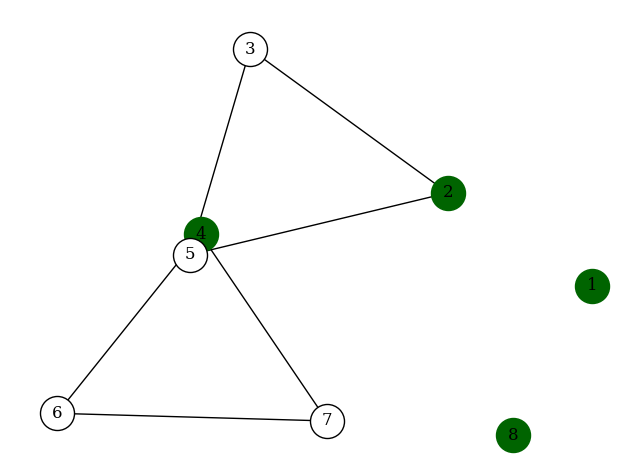

Solution nodes:  [1, 2, 4, 8]
Solution frequency: 1.0
Solution size: 4


In [3]:
if sys.version_info[1] < 13: 
    from qubosolver.config import SolverConfig
    from qubosolver.solver import QuboSolver

    config = SolverConfig(use_quantum=False) # will use a local emulator
    solver = QuboSolver(qubo_mis, config)
    solution = solver.solve()

    # to turn QUBO solutions to MIS
    bitstrings_to_nodes = [row.nonzero(as_tuple=True)[0].tolist() for row in solution.bitstrings if row.sum().item() > 0]

    # take only the first solution
    mis_sol = MISSolution(instance, frequency=1.0, nodes=bitstrings_to_nodes[0])
    mis_sol.draw()
    print("Solution nodes: ", mis_sol.nodes)
    print("Solution frequency:", mis_sol.frequency)
    print("Solution size:", mis_sol.size)

## Using a quantum solver

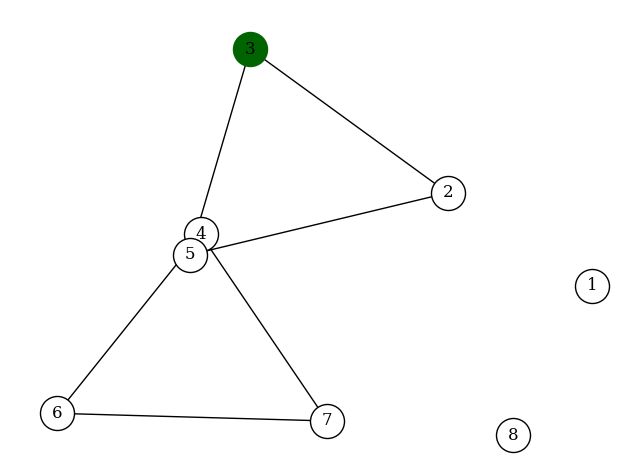

Solution nodes:  [3]
Solution frequency: tensor(0.0300)
Solution size: 1


In [4]:
if sys.version_info[1] < 13: 
    config = SolverConfig(use_quantum=True) # will use a local emulator
    solver = QuboSolver(qubo_mis, config)
    solution = solver.solve()

    # to turn QUBO solutions to MIS
    bitstrings_to_nodes = [row.nonzero(as_tuple=True)[0].tolist() for row in solution.bitstrings if row.sum().item() > 0]

    # take only the first solution
    mis_sol = MISSolution(instance, frequency=solution.probabilities[0], nodes=bitstrings_to_nodes[0])
    mis_sol.draw()
    print("Solution nodes: ", mis_sol.nodes)
    print("Solution frequency:", mis_sol.frequency)
    print("Solution size:", mis_sol.size)